In [1]:
%matplotlib notebook
from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
# rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycocosn as pcc

<IPython.core.display.Javascript object>


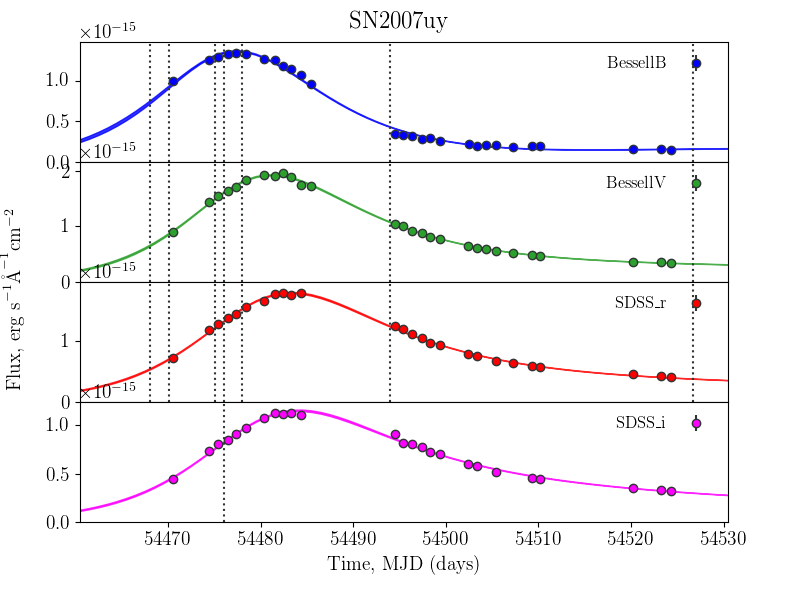

In [2]:
snname = "SN2007uy"

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

sn.plot_lc(xextent=60, showsnname=True)

<IPython.core.display.Javascript object>


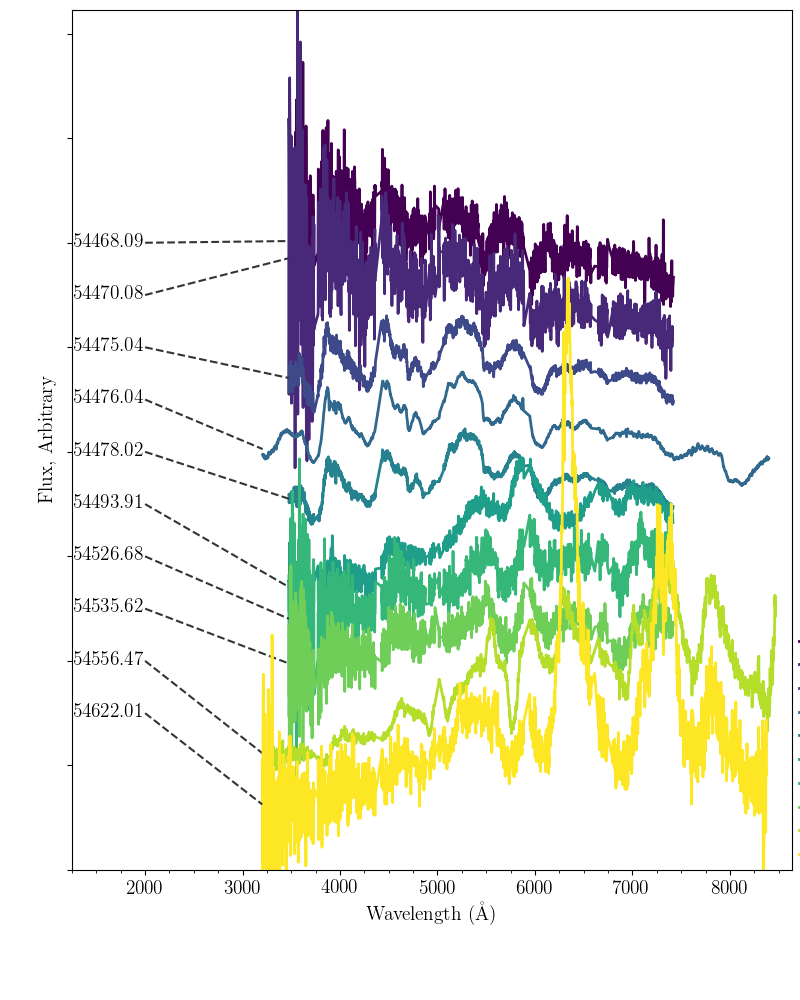

In [3]:
sn.plot_spec()

In [4]:
for j in zip(sn.spec, [sn.spec[i].mjd_obs for i in sn.spec]):
    print(j)

('2007uy_-13.01.txt', 54468.089999999997)
('2007uy_-11.02.txt', 54470.080000000002)
('2007uy_-6.06.txt', 54475.040000000001)
('2007uy_-5.06.txt', 54476.040000000001)
('2007uy_-3.08.txt', 54478.019999999997)
('2007uy_12.81.txt', 54493.910000000003)
('2007uy_45.58.txt', 54526.68)
('2007uy_54.52.txt', 54535.620000000003)
('2007uy_75.37.txt', 54556.470000000001)
('2007uy_140.91.txt', 54622.010000000002)


In [5]:
spec = sn.spec["2007uy_-5.06.txt"]

In [6]:
sn.phot.data_filters

OrderedDict([('BessellB', <pycoco.classes.FilterClass at 0x10cc9ff98>),
             ('BessellV', <pycoco.classes.FilterClass at 0x10cc9fb38>),
             ('SDSS_r', <pycoco.classes.FilterClass at 0x10cd15470>),
             ('SDSS_i', <pycoco.classes.FilterClass at 0x10cdf7860>)])

In [7]:
filter_name = "BessellB"
S = sn.spec["2007uy_-5.06.txt"]

for i, filter_name in enumerate(sn.phot.data_filters):
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=sn.phot.data_filters[filter_name], spectrum_object=S)
    print(flux)
    if i == 0:
        S.specphot = Table(names = ("lambda_effective", "flux", "filter"), dtype=('f4', 'f4', 'S'))

    S.specphot.add_row((sn.phot.data_filters[filter_name].lambda_effective, flux, filter_name))
    

filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  3205.99597
max wavelength =  8398.85329
Filter_area =  958.900709451
Integrated flux =  1.25909026676e-14
1.3130559341e-17
filter =  BessellV
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  3205.99597
max wavelength =  8398.85329
Filter_area =  893.099869886
Integrated flux =  1.32496535361e-14
1.4835578845e-17
filter =  SDSS_r
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  3205.99597
max wavelength =  8398.85329
Filter_area =  1108.15446154
Integrated flux =  1.31215362613e-14
1.18408910641e-17
filter =  SDSS_i
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  3205.99597
max wavelength =  8398.85329
Filter_area =  1100.31575923
Integrated flux =  8.57079751374e-15
7.78939812674e-18


<IPython.core.display.Javascript object>


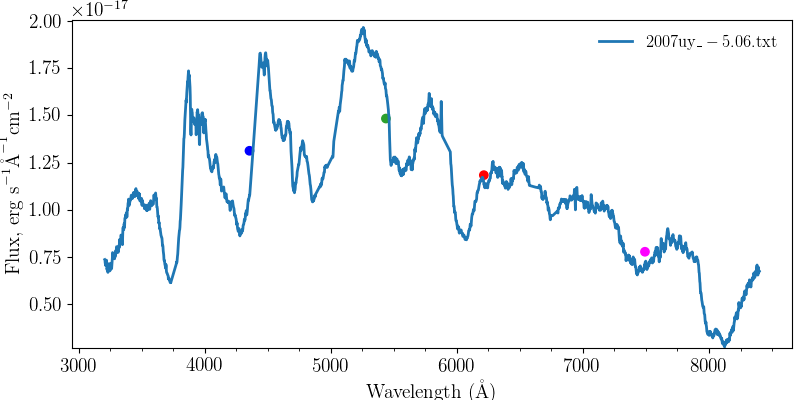

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [8]:
fig = sn.spec["2007uy_-5.06.txt"].plot(return_figure = True)

ax = fig.add_subplot(111)

ax.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

In [9]:
S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,1.31306e-17,BessellB
5436.87,1.48356e-17,BessellV
6213.67,1.18409e-17,SDSS_r
7491.96,7.7894e-18,SDSS_i


# Extension Using a Black Body
___

In [10]:
from astropy.modeling import blackbody as bb
from astropy.table import Table, Column, Row
from astropy import units as u

In [11]:
bb.blackbody_lambda

<function astropy.modeling.blackbody.blackbody_lambda>

<IPython.core.display.Javascript object>


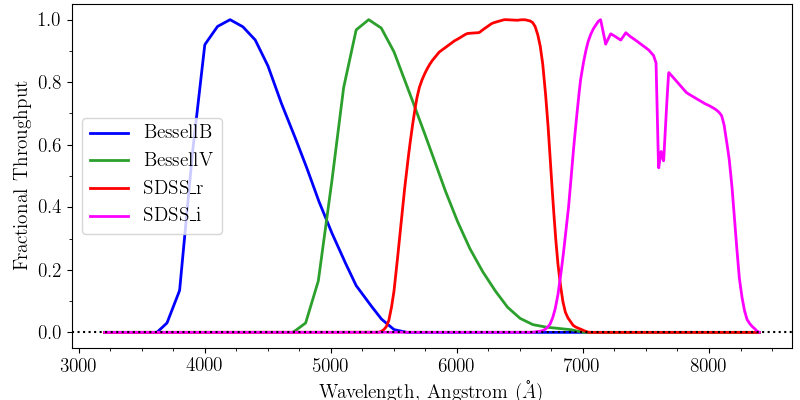

In [12]:
sn.plot_filters()

In [13]:
filter_name = "SDSS_i"
new_max_wavelength = 9500
wav_interval = 1.0

orig_wavelength = sn.phot.data_filters[filter_name].wavelength
extend_wavelength = np.append(np.arange(orig_wavelength[-1]+1.0, new_max_wavelength, wav_interval), new_max_wavelength)

In [14]:
bb_flux = bb.blackbody_lambda(np.array(orig_wavelength)*u.AA, temperature=10000*u.Kelvin)

dt_blackbody = Table([orig_wavelength, bb_flux], names=("wavelength", "flux"))

In [15]:
bb_S = pcc.classes.SpectrumClass()

In [16]:
bb_S.load_table(dt_blackbody)

<IPython.core.display.Javascript object>


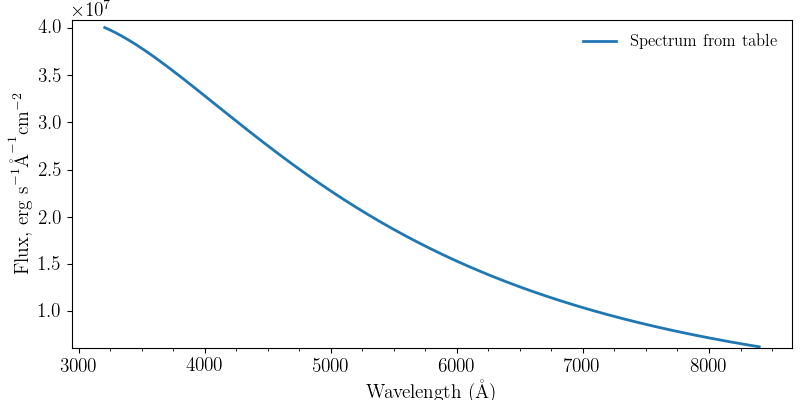

In [17]:
bb_S.plot()

In [18]:
# type(sn.phot.data_filters)
bb_S.check_overlaps(sn.phot.data_filters, verbose = True)

0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True


In [19]:
bb_S._overlapping_filter_list

array(['BessellB', 'BessellV', 'SDSS_r', 'SDSS_i'],
      dtype='<U8')

In [20]:
bb_S.get_specphot(sn.phot.data_filters, verbose = True)

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
flux in filter BessellB  is  28515082.2157
getting specphot for  1 BessellV
flux in filter BessellV  is  18762278.8059
getting specphot for  2 SDSS_r
flux in filter SDSS_r  is  14372218.8177
getting specphot for  3 SDSS_i
flux in fil

In [21]:
bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,2.85151e+07,BessellB
5436.87,1.87623e+07,BessellV
6213.67,1.43722e+07,SDSS_r
7491.96,8.71718e+06,SDSS_i


<IPython.core.display.Javascript object>


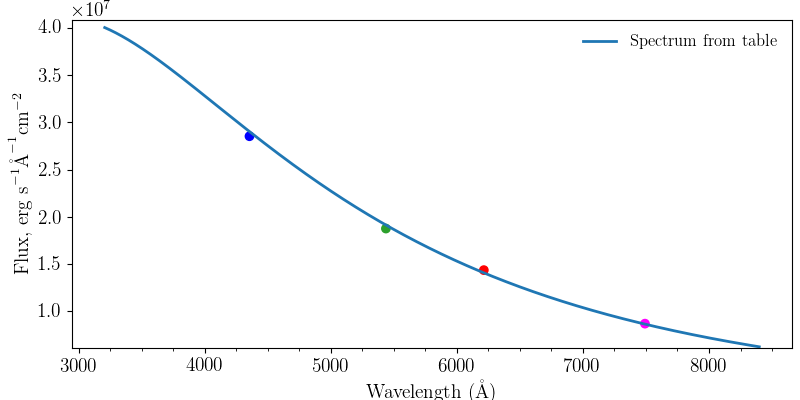

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [22]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])


In [23]:
red_bb_S = pcc.classes.SpectrumClass()
red_bb_S.load_table(dt_blackbody)
red_bb_S.check_overlaps(sn.phot.data_filters)

red_bb_S.flux = pcc.extinction.unred(red_bb_S.wavelength, red_bb_S.flux, EBV=-0.2)

red_bb_S.get_specphot(sn.phot.data_filters, verbose = True)

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
flux in filter BessellB  is  13322308.6657
getting specphot for  1 BessellV
flux in filter BessellV  is  10522963.5022
getting specphot for  2 SDSS_r
flux in filter SDSS_r  is  8671030.44517
getting specphot for  3 SDSS_i
flux in fil

<IPython.core.display.Javascript object>


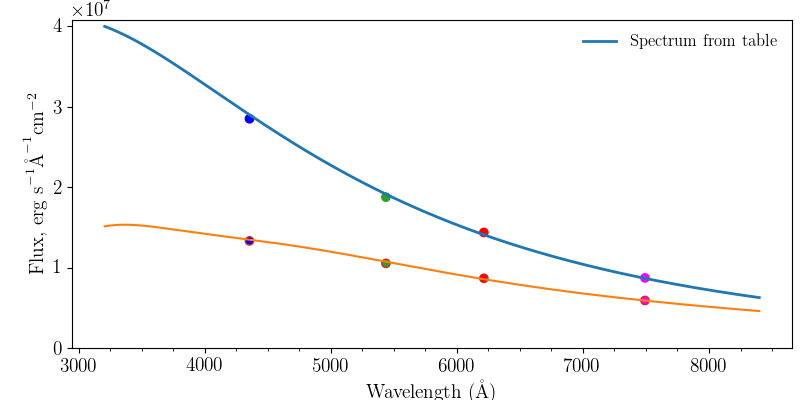

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0, 40795331.11614605)

In [24]:
fig = bb_S.plot(return_figure=True)

ax1 = fig.add_subplot(111)
ax1.scatter(bb_S.specphot["lambda_effective"], bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters])

ax1.plot(red_bb_S.wavelength, red_bb_S.flux, color = "C1")
ax1.scatter(red_bb_S.specphot["lambda_effective"], red_bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters], edgecolors="C3")

ax1.set_ylim(0.0, ax1.get_ylim()[1])

In [25]:
red_bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,1.33223e+07,BessellB
5436.87,1.0523e+07,BessellV
6213.67,8.67103e+06,SDSS_r
7491.96,5.91386e+06,SDSS_i


In [26]:
bb_S.specphot

lambda_effective,flux,filter
float32,float32,bytes32
4354.41,2.85151e+07,BessellB
5436.87,1.87623e+07,BessellV
6213.67,1.43722e+07,SDSS_r
7491.96,8.71718e+06,SDSS_i


In [27]:
flux_scale = red_bb_S.specphot["flux"][np.where(red_bb_S.specphot["filter"] == "SDSS_i")] / S.specphot["flux"][np.where(S.specphot["filter"] == "SDSS_i")]

In [28]:
red_bb_S.data["flux"] = red_bb_S.data["flux"] / flux_scale
red_bb_S.flux = red_bb_S.flux / flux_scale

In [29]:
red_bb_S.get_specphot(sn.phot.data_filters, verbose = True)

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
flux in filter BessellB  is  1.75473943849e-17
getting specphot for  1 BessellV
flux in filter BessellV  is  1.38602546529e-17
getting specphot for  2 SDSS_r
flux in filter SDSS_r  is  1.14209927696e-17
getting specphot for  3 SDSS_i

<IPython.core.display.Javascript object>


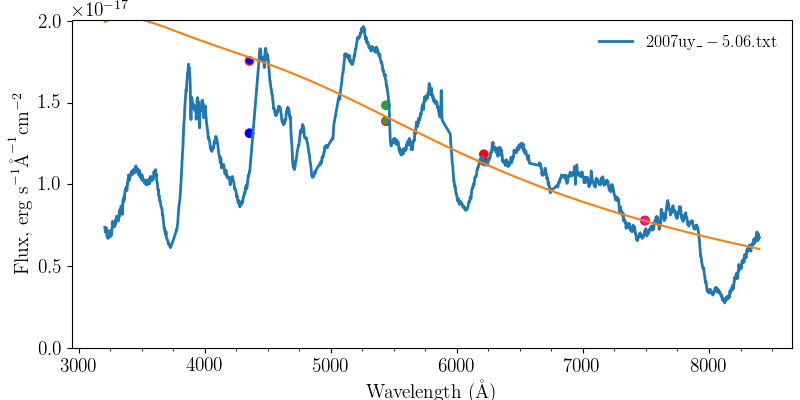

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0, 2.00481e-17)

In [30]:
fig = sn.spec["2007uy_-5.06.txt"].plot(return_figure = True)

ax1 = fig.add_subplot(111)

ax1.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

ax1.plot(red_bb_S.wavelength, red_bb_S.flux, color = "C1")
ax1.scatter(red_bb_S.specphot["lambda_effective"], red_bb_S.specphot["flux"], label="Specphot",
            c = [pcc.colours.hex[i] for i in sn.phot.data_filters], edgecolors="C3")

ax1.set_ylim(0.0, ax1.get_ylim()[1])

In [31]:
# specphot
# specphot_bb

In [32]:
from lmfit import minimize, Parameters, fit_report

params = Parameters()
params.add("T", value=10000) ## BB temp
params.add("flux_scale", value=1e23) ## Flux Scaling
params.add("EBV", value=0.0) ## Extinction

# specphot, T, EBV, flux_scale, filters
def bb_min(params, specphot, filters, wavelength, verbose=False):
    
    T = params["T"]
    flux_scale = params["flux_scale"]
    EBV = params["EBV"]
    
    bb_flux = bb.blackbody_lambda(np.array(wavelength)*u.AA, temperature=T*u.Kelvin)

    bb_spec = pcc.classes.SpectrumClass()
    bb_spec.load_table(Table([wavelength, bb_flux], names=("wavelength", "flux")))
  
    bb_spec.flux = pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV)

    bb_spec.data["flux"] = bb_spec.data["flux"] / flux_scale
    bb_spec.flux = bb_spec.flux / flux_scale

    bb_spec.get_specphot(filters, verbose = verbose)

    residual = specphot["flux"] - bb_spec.specphot["flux"]

#     return np.sum((residual)**2)
    return residual

def bb_min_fun(params, specphot, filters, wavelength, verbose=False):
    
    T = params["T"]
    flux_scale = params["flux_scale"]
    EBV = params["EBV"]
    
    bb_flux = bb.blackbody_lambda(np.array(wavelength)*u.AA, temperature=T*u.Kelvin)

    bb_spec = pcc.classes.SpectrumClass()
    bb_spec.load_table(Table([wavelength, bb_flux], names=("wavelength", "flux")))
    
    bb_spec.flux = pcc.extinction.unred(bb_spec.wavelength, bb_spec.flux, EBV=EBV)

    bb_spec.data["flux"] = bb_spec.data["flux"] / flux_scale
    bb_spec.flux = bb_spec.flux / flux_scale

    bb_spec.get_specphot(filters, verbose = verbose)

    return bb_spec

In [33]:
out = minimize(bb_min, params, args=(S.specphot, sn.phot.data_filters, orig_wavelength), kws = ({"verbose": False}))

In [34]:
print(fit_report(out))

paramlist = np.array([out.params[key].value for key in out.params.keys()])

[[Fit Statistics]]
    # function evals   = 64
    # data points      = 4
    # variables        = 3
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -325.179
    Bayesian info crit = -327.020
[[Variables]]
    T:            4967.22017 +/- 2.20e+04 (442.75%) (init= 10000)
    flux_scale:   2.1407e+23 +/- 1.07e+24 (500.68%) (init= 1e+23)
    EBV:          0.29438371 +/- 6.443909 (2188.95%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(T, EBV)                    = -1.000 
    C(T, flux_scale)             =  0.997 
    C(flux_scale, EBV)           = -0.995 


In [35]:
# best_bb = bb_min_fun(out.params, S.specphot, sn.phot.data_filters, S.wavelength)
best_bb = bb_min_fun(out.params, S.specphot, sn.phot.data_filters, Column(np.arange(2000, 10000)*u.Angstrom))

<IPython.core.display.Javascript object>


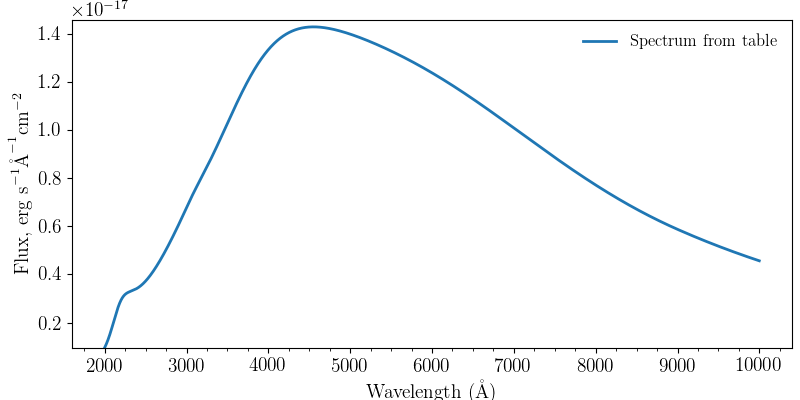

In [36]:
best_bb.plot()

<IPython.core.display.Javascript object>


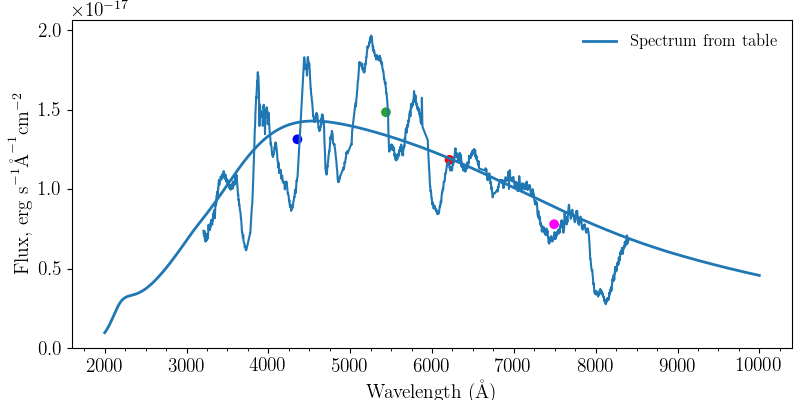

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0.0, 2.0637749999999999e-17)

In [37]:
fig = best_bb.plot(return_figure=True)


ax = fig.add_subplot(111)
ax.plot(S.wavelength, S.flux)
ax.scatter(S.specphot["lambda_effective"], S.specphot["flux"], c = [sn.phot.data_filters[f]._plot_colour for f in sn.phot.data_filters])

ax.set_ylim(0., 1.05*np.nanmax(S.flux))

In [38]:
w_blue = np.where(best_bb.wavelength < np.nanmin(S.wavelength))
w_red = np.where(best_bb.wavelength > np.nanmax(S.wavelength))

In [39]:
new_flux = np.append(best_bb.flux[w_blue], np.append(S.flux, best_bb.flux[w_red]))
new_wavelength = np.append(best_bb.wavelength[w_blue], np.append(S.wavelength, best_bb.wavelength[w_red]))


In [40]:
new_spectrum = pcc.classes.SpectrumClass()
new_spectrum.load_table(Table([new_wavelength, new_flux], names=("wavelength", "flux")))

<IPython.core.display.Javascript object>


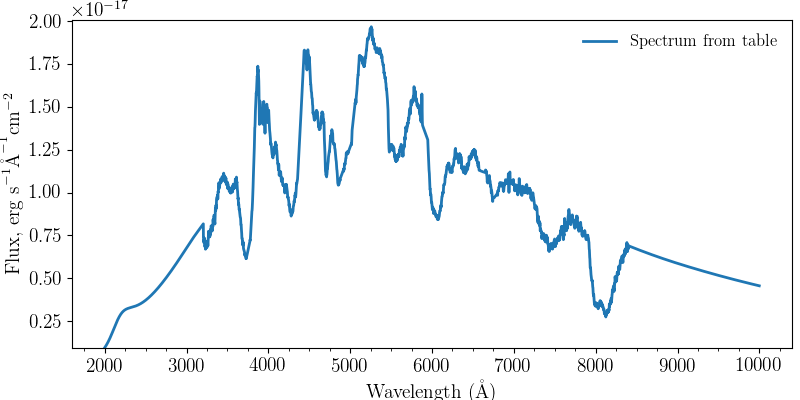

In [41]:
new_spectrum.plot()

In [42]:
sn.phot.data_filters

OrderedDict([('BessellB', <pycoco.classes.FilterClass at 0x10cc9ff98>),
             ('BessellV', <pycoco.classes.FilterClass at 0x10cc9fb38>),
             ('SDSS_r', <pycoco.classes.FilterClass at 0x10cd15470>),
             ('SDSS_i', <pycoco.classes.FilterClass at 0x10cdf7860>)])

In [43]:
pcc.kcorr.fit_bb(S, filter_dict=sn.phot.data_filters, return_table=True, verbose=True)

<class 'astropy.units.core.Unit'>
passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])


passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
f

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
f

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
f

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
f

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
f

passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
0 <pycoco.classes.FilterClass object at 0x10cc9ff98>
True
1 <pycoco.classes.FilterClass object at 0x10cc9fb38>
True
2 <pycoco.classes.FilterClass object at 0x10cd15470>
True
3 <pycoco.classes.FilterClass object at 0x10cdf7860>
True
Overlapping filter list =  <class 'numpy.ndarray'> ['BessellB' 'BessellV' 'SDSS_r' 'SDSS_i']
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10cc9ff98>), ('BessellV', <pycoco.classes.FilterClass object at 0x10cc9fb38>), ('SDSS_r', <pycoco.classes.FilterClass object at 0x10cd15470>), ('SDSS_i', <pycoco.classes.FilterClass object at 0x10cdf7860>)])
getting specphot for  0 BessellB
f

wavelength,flux
float64,float64
2000.0,9.61068378012e-19
2001.0,9.68064768797e-19
2002.0,9.751147583e-19
2003.0,9.82218620908e-19
2004.0,9.89376626041e-19
2005.0,9.96589037925e-19
2006.0,1.00385611535e-18
2007.0,1.01117811143e-18
2008.0,1.01855527336e-18


In [44]:
new_spec = pcc.classes.SpectrumClass()

new_spec.load_table(pcc.kcorr.fit_bb(S, filter_dict=sn.phot.data_filters, return_table=True))

<IPython.core.display.Javascript object>


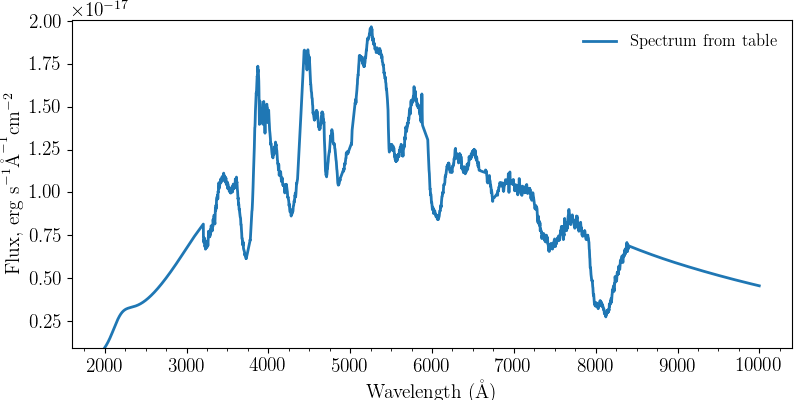

In [45]:
new_spec.plot()

## Testing
___

<IPython.core.display.Javascript object>


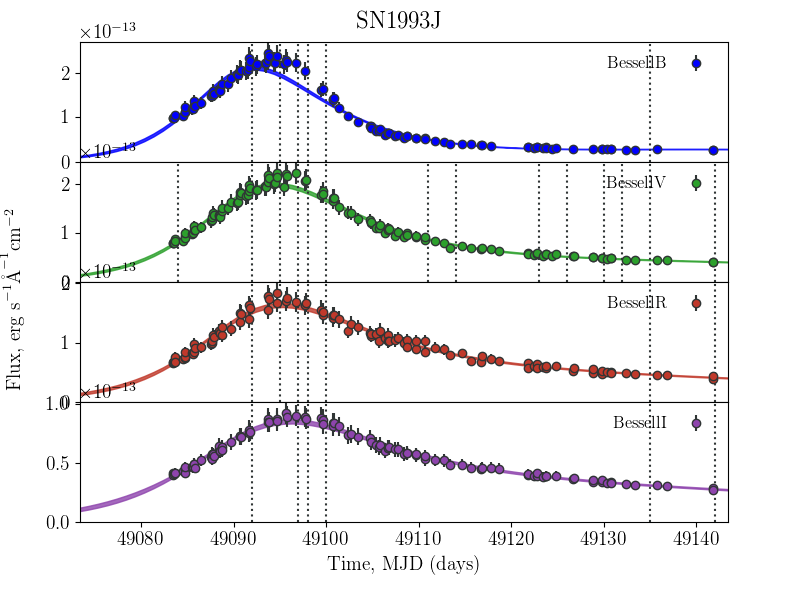

In [46]:
snname = "SN1993J"

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

sn.plot_lc(xextent=60, showsnname=True)

In [47]:
sn.spec["1993J_-11.0.txt"]._n_overlapping_filters

1

In [48]:
for i in [sn.spec["1993J_-11.0.txt"]._overlapping_filter_list]:
    print(i)

BessellV


# Extension with other Spectra
____

The use of a Black Body is not always a good choice. When the spectrum is nebular or absorption-line dominated for example. Even above, the spectrum is not a Black Body.

An alternative is to extend by using either a very simple model - a straight line for example, or a "donor" spectrum from a similar object.

In [49]:
snname = "SN1993J"

sn = pcc.classes.SNClass(snname)
sn.load_phot(path=os.path.join(pcc.defaults._default_data_dir_path, "lc/" + snname + ".dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, "SN1993J.list"))

sn.load_spec()
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
sn.check_overlaps()

spec_key = "1993J_16.0.txt"

print(spec_key)
S = sn.spec[spec_key]
S.get_specphot(sn.phot.data_filters, verbose=True)

new_spec = pcc.classes.SpectrumClass()

# new_spec.load_table(pcc.kcorr.fit_bb(S, filter_dict=sn.phot.data_filters, return_table=True, verbose=True))

1993J_16.0.txt
passed filter objects =  <class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10d3751d0>), ('BessellV', <pycoco.classes.FilterClass object at 0x10dce0e10>), ('BessellR', <pycoco.classes.FilterClass object at 0x10d6d2198>), ('BessellI', <pycoco.classes.FilterClass object at 0x10dacb5f8>)])
Overlapping filter list =  <class 'numpy.ndarray'> BessellV
only one overlapping filter
<class 'collections.OrderedDict'> OrderedDict([('BessellB', <pycoco.classes.FilterClass object at 0x10d3751d0>), ('BessellV', <pycoco.classes.FilterClass object at 0x10dce0e10>), ('BessellR', <pycoco.classes.FilterClass object at 0x10d6d2198>), ('BessellI', <pycoco.classes.FilterClass object at 0x10dacb5f8>)])
getting specphot for  0 BessellB
flux in filter BessellB  is  4.70741236782e-18
getting specphot for  1 BessellV
flux in filter BessellV  is  1.3469777441e-17
getting specphot for  2 BessellR
flux in filter BessellR  is  1.50867296595e-17
getting s

<IPython.core.display.Javascript object>


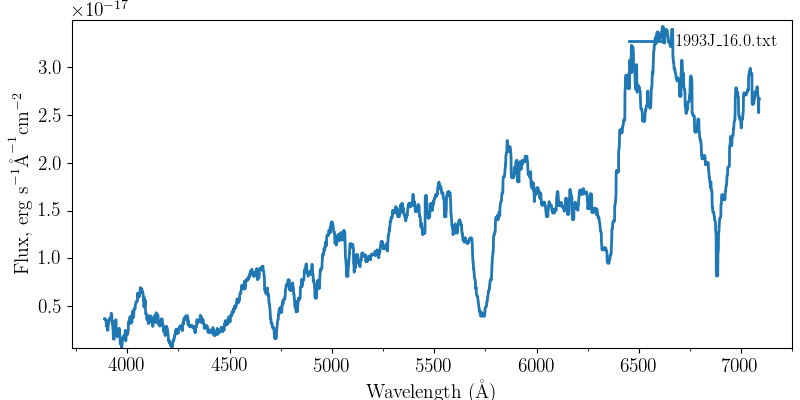

In [50]:
S.plot()

In [51]:
donor_early = "SN2011dh/2011dh_-17.67.txt"            ## IIb
donor_peak = "SN2011fu/2011fu_4.12.txt"               ## IIb
donor_late = "SN2011fu/2011fu_17.87.txt"              ## IIb

donor_early = "iPTF13bvn/iPTF13bvn_-13.74.txt"        ## Ib
donor_peak = "SN2007Y/2007Y_-1.79.txt"                ## Ib
donor_late = "SN1999dn/1999dn_18.82.txt"              ## Ib

donor_early = "SN2007gr/2007gr_-9.18.txt"             ## Ic
donor_peak = "SN2003jd/2003jd_-3.14.txt"              ## Ic
donor_late = "SN2007gr/2007gr_13.78.txt"              ## Ic

<IPython.core.display.Javascript object>


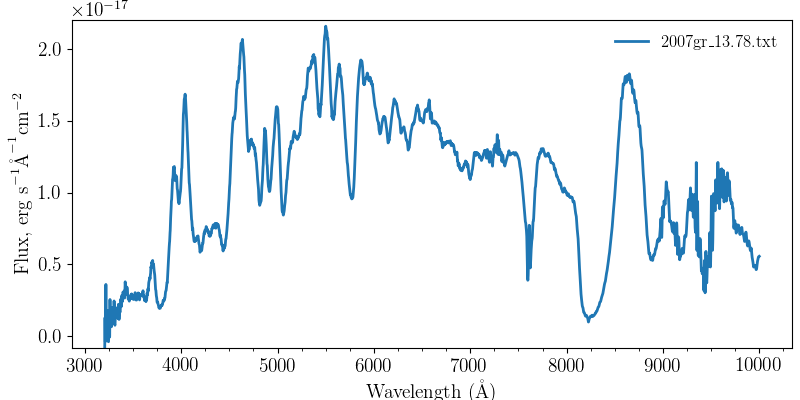

In [52]:
# donor = donor_peak
donor = donor_late
S_donor = pcc.classes.SpectrumClass()
S_donor.load(filename=donor, 
             directory=os.path.join(pcc.defaults._default_data_dir_path, "spec"))
S_donor.plot()

7088.00113 2.6718e-17
1.26893e-17
2.10555349783


<IPython.core.display.Javascript object>


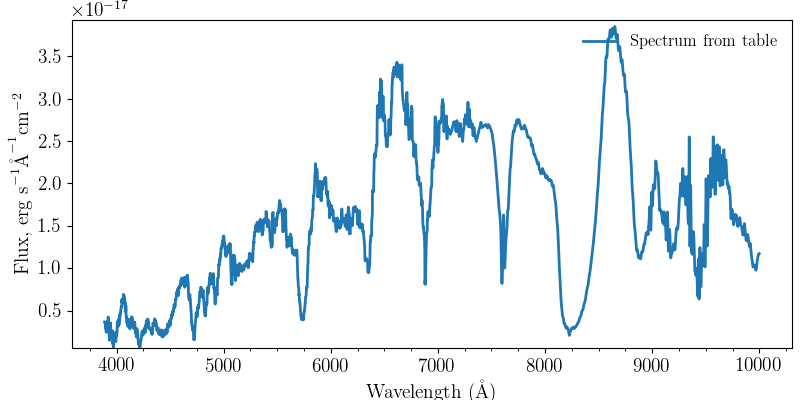

In [53]:
from astropy.table import Table, Column, vstack

wmax = np.nanmax(S.wavelength)
wmax_flux = S.flux[np.where(S.wavelength == wmax)][0]
print(wmax, wmax_flux)

red_spec_table = S_donor.data[np.where(S_donor.data["wavelength"] > wmax)]

donor_flux = red_spec_table["flux"][np.where(red_spec_table["wavelength"] == np.nanmin(red_spec_table["wavelength"]))][0]
print(donor_flux)

flux_scaling = wmax_flux/donor_flux
print(flux_scaling)

red_spec_table["flux"] = red_spec_table["flux"]*flux_scaling

combined_spec = pcc.classes.SpectrumClass()
combined_spec.load_table(vstack([S.data, red_spec_table]), path="")
combined_spec.plot()

7088.00113 2.6718e-17
1.2415e-17
2.15207410391


<IPython.core.display.Javascript object>


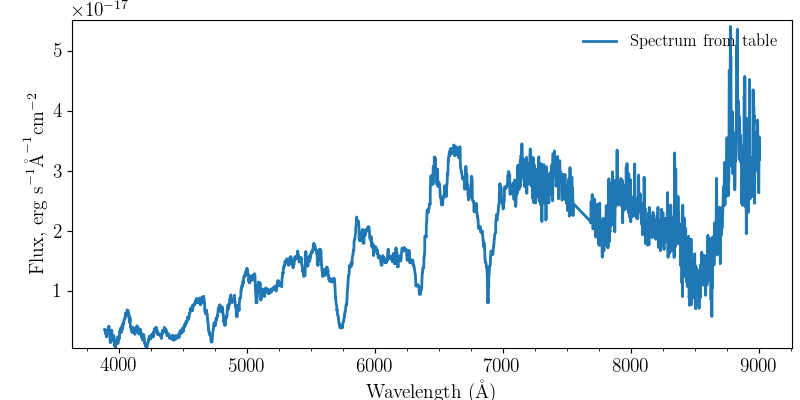

In [54]:
combined_spec = pcc.kcorr.donor_extend(S, sn)
combined_spec.plot()

<IPython.core.display.Javascript object>


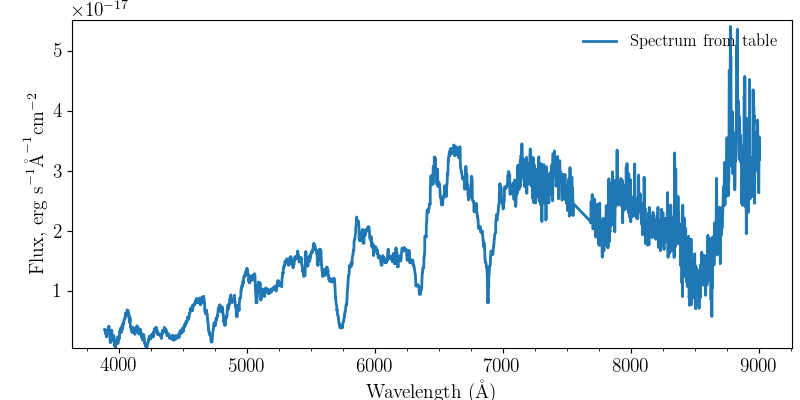

In [55]:
combined_spec.plot()

### Flat Linear Extension
____

<IPython.core.display.Javascript object>


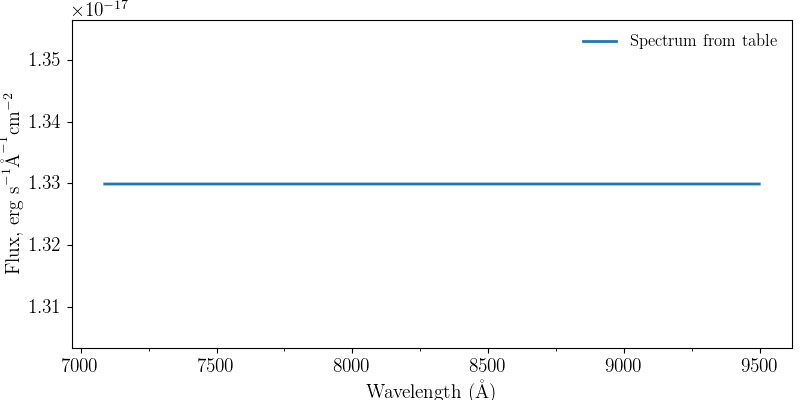

In [56]:
extension_wavelength = np.arange(np.nanmax(S.wavelength), new_max_wavelength ) * u.Angstrom
extension_flux = np.ones(len(extension_wavelength)) * np.mean(S.flux)

extension_spec = pcc.classes.SpectrumClass()
extension_spec.load_table(Table([extension_wavelength, extension_flux], names=("wavelength", "flux")))
extension_spec.plot()

In [57]:
from astropy.table import vstack

<IPython.core.display.Javascript object>


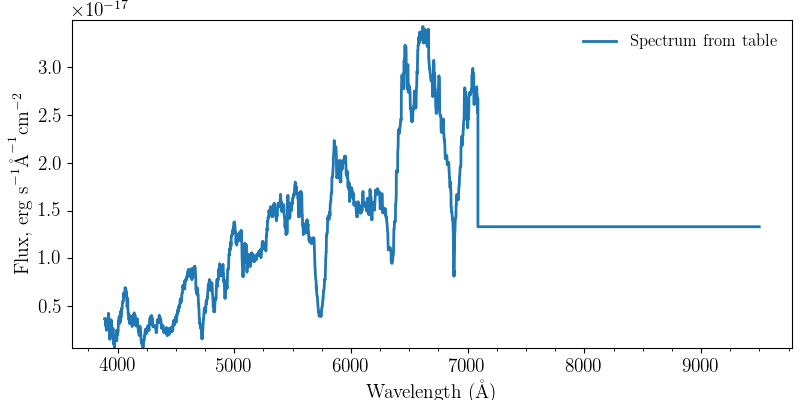

In [58]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(vstack([S.data, extension_spec.data]))
extended_spec.plot()

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


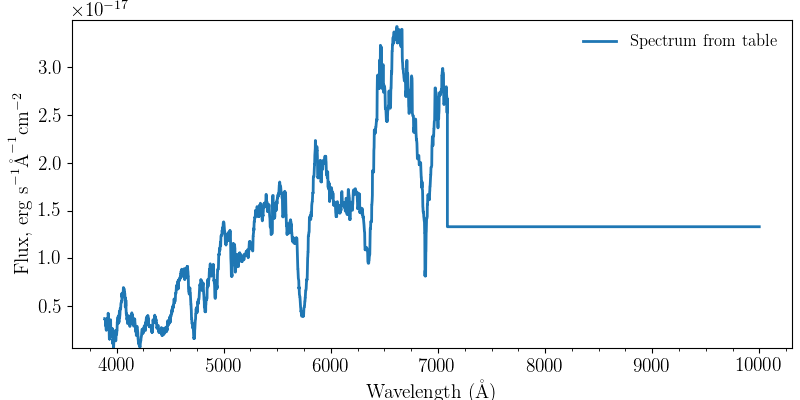

In [59]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(pcc.kcorr.flat_extend(S, return_table=True))
extended_spec.plot()

### Declining Linear Extension
___

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


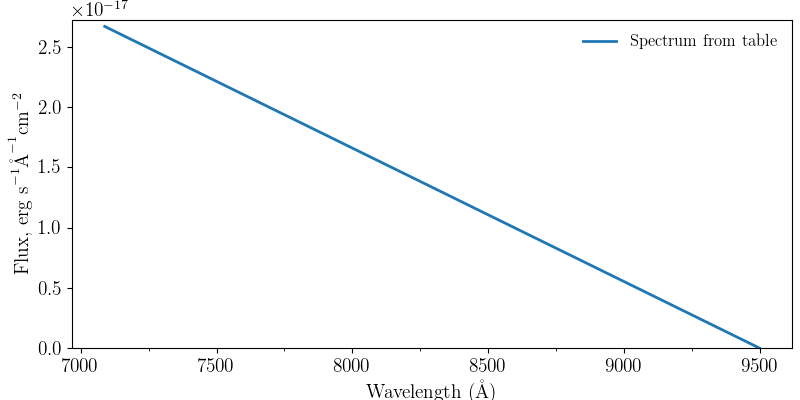

In [60]:
extension_wavelength = np.arange(np.nanmax(S.wavelength), new_max_wavelength ) * u.Angstrom
extension_flux = np.linspace(S.flux[-1], 0, len(extension_wavelength))

extension_spec = pcc.classes.SpectrumClass()
extension_spec.load_table(Table([extension_wavelength, extension_flux], names=("wavelength", "flux")))
extension_spec.plot()

In [61]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(vstack([S.data, extension_spec.data]))

In [62]:
extended_spec.data

wavelength,flux
Angstrom,erg / (Angstrom cm2 s)
float64,float64
3890.00096,3.67029e-18
3891.00086,3.67005e-18
3892.00076,3.52263e-18
3893.00066,3.52241e-18
3894.00056,3.52927e-18
3895.00046,3.52195e-18
3896.00036,3.52173e-18
3897.00026,3.52859e-18


/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


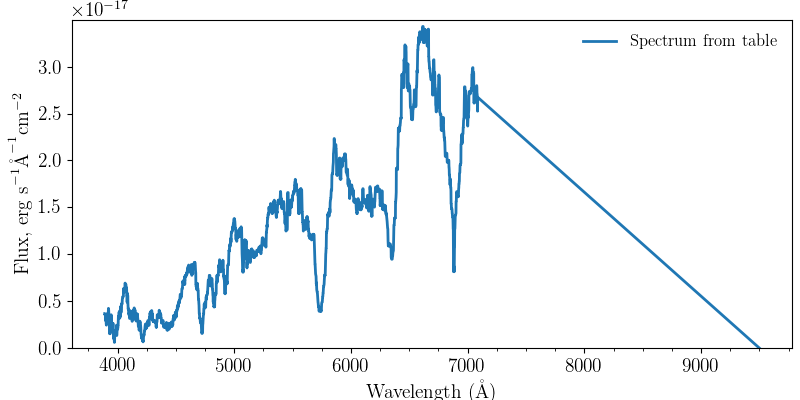

In [63]:
extended_spec.plot()

Incorporated into **`pcc.kcorr.linear_extend`**

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


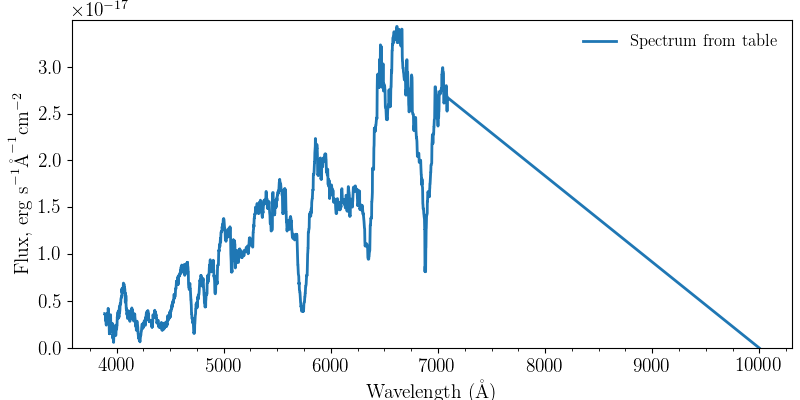

In [64]:
extended_spec = pcc.classes.SpectrumClass()
extended_spec.load_table(pcc.kcorr.linear_extend(S, return_table=True))
extended_spec.plot()

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


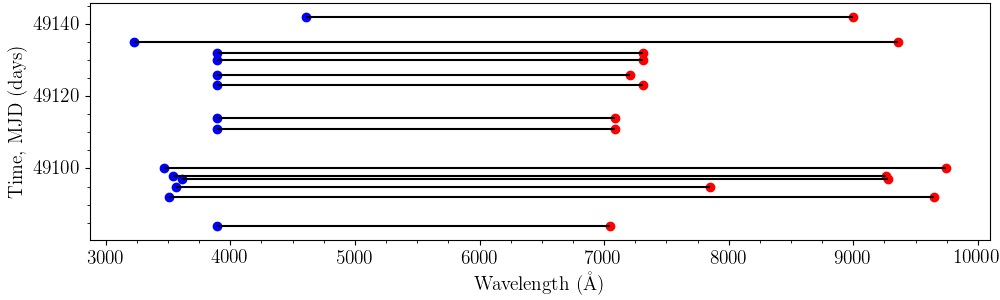

In [65]:
sn.plot_spec_coverage()

# Loading Extended Spectra
___


In [66]:
sn = pcc.classes.SNClass(snname)

listfile = os.path.join(pcc.defaults._default_list_dir_path, snname + ".list")

sn.load_list(path=listfile)
newpath = Column([os.path.join(pcc.defaults._default_data_dir_path, "spec_extended/") + path.split("/")[-1].replace(".txt", ".flat.txt") for path in sn.list["spec_path"]], name="spec_path")

list_table = sn.list
sn.list = Table([newpath, list_table["snname"], list_table["mjd_obs"], list_table["z"]])
# sn.load_spec()
# sn.plot_spec()

/Users/berto/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


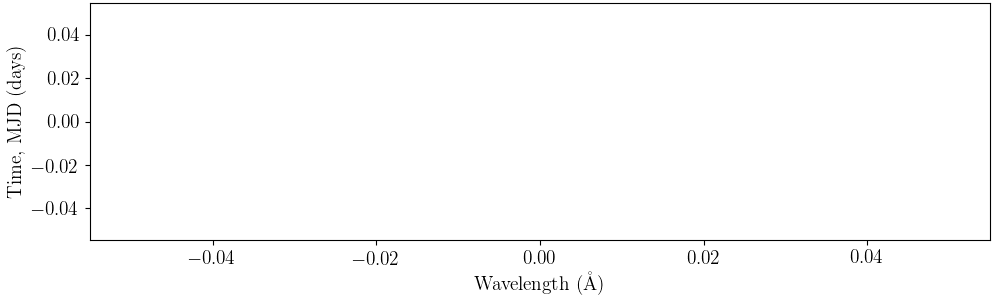

In [67]:
sn.plot_spec_coverage()